In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data = pd.read_csv(r"C:\Users\Hp\Desktop\ICT\data set\fish.csv", names=['Species', 'A', 'B','C','D','E','F'])

In [32]:
data.head()

,Species,A,B,C,D,E,F
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [33]:
data.shape

(85, 7)

In [34]:
data.Species.unique()

array(['Bream', 'Roach', 'Smelt', 'Pike'], dtype=object)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  85 non-null     object 
 1   A        85 non-null     float64
 2   B        85 non-null     float64
 3   C        85 non-null     float64
 4   D        85 non-null     float64
 5   E        85 non-null     float64
 6   F        85 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.8+ KB


In [36]:
data=pd.get_dummies(data)

In [37]:
data.head()

,A,B,C,D,E,F,Species_Bream,Species_Pike,Species_Roach,Species_Smelt
0,242.0,23.2,25.4,30.0,38.4,13.4,1,0,0,0
1,290.0,24.0,26.3,31.2,40.0,13.8,1,0,0,0
2,340.0,23.9,26.5,31.1,39.8,15.1,1,0,0,0
3,363.0,26.3,29.0,33.5,38.0,13.3,1,0,0,0
4,430.0,26.5,29.0,34.0,36.6,15.1,1,0,0,0


In [38]:
from sklearn.cluster import KMeans

In [40]:
wcss = []
for i in range(1,13):
    kmeans = KMeans(n_clusters = i ,init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'wcss')

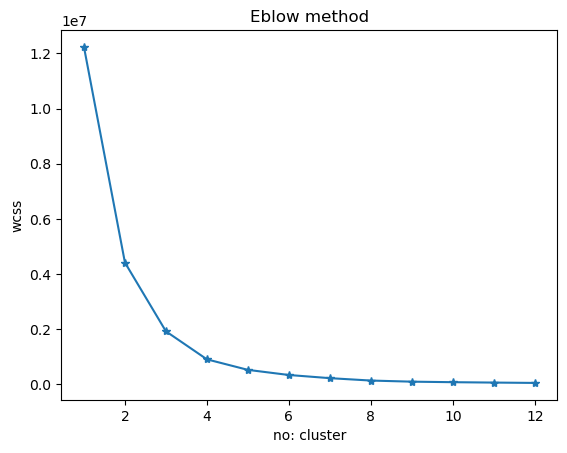

In [41]:
plt.plot(range(1,13),wcss,'-*')
plt.title('Eblow method')
plt.xlabel('no: cluster')
plt.ylabel('wcss')

In [42]:
# Kmeans
kmeans = KMeans(n_clusters = 4 ,init = 'k-means++', random_state = 42)
y_kmeans=kmeans.fit_predict(data)
  

In [43]:
print(y_kmeans)

[0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2
 2 2 2 2 2 1 1 3 3 3 3]


In [44]:
from sklearn.metrics import silhouette_score


In [45]:
silhouette_sc=silhouette_score(data,y_kmeans)
print(silhouette_sc)

0.6077749747794599
